# EE5907/EE5027 CA1
Author: Liu Weihao, Complete on 19th Sep
### Part I: MAP
#### Q1,Q2,Q3

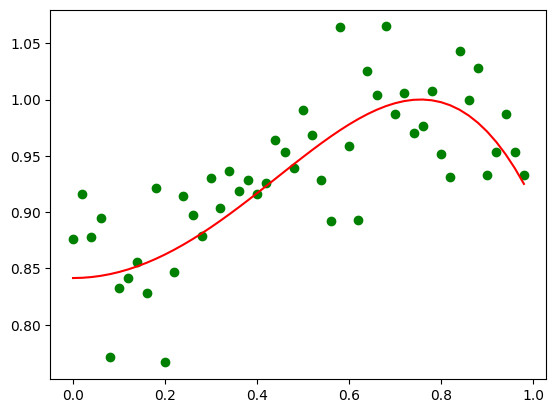

In [52]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import linalg

BETA=0.2

# Generate 50 2D-data points
x = np.arange(0,1,0.02)
y = np.sin(np.power(x,2) + 1)

# Add gaussian noise. 0-mean, standard deiation:0.1
noise = np.random.normal(0,BETA**2,size=(50))
y_s = y+noise
plt.plot(x,y,'r-')
plt.scatter(x,y_s,color='green')
plt.show()

#### Q4: Fit the noisy data using the MAP
$$
\bar{W}=(\mathbb{X}^T\mathbb{X}+\frac{\alpha}{\beta}I)^{-1}\mathbb{X}^T\bar{t}
$$
Where $\bar{W}$ is what we want. $\mathbb{X}$ is a $N\times M$ matrix, $t$ is a $N\times 1$ matrix.
$$
\mathbb{X}=\left(\begin{array}{cc} 
x_0^0&x_0^1&\ldots&x_0^{M-1}\\
x_1^0&x_1^1&\ldots&x_1^{M-1}\\
\vdots & \vdots & \ddots \\
x_{N-1}^0&x_{N-1}^1&\ldots&x_{N-1}^{M-1}
\end{array}\right)
$$
$$
\bar{t}=y=\left(\begin{array}{cc}
y_0\\y_1\\\vdots\\ y_{N-1}
\end{array}\right)
$$
In our case, $y$ is $t$. $\alpha$ is standard deiation of $w$, $\beta$ is standard deiation of $\bar{w}^T\bar{x}_n$($\bar{t}$).

In [63]:
# Global parameter M and N. Let alpha = 0.05
LEN_M = 4
LEN_N = len(x)
ALPHA = 0.1
# Generate X and t
x_m = np.array([np.power(x,i) for i in range(LEN_M)]).reshape(LEN_M,LEN_N).T
t = y_s.reshape(LEN_N,1)
print(f'The shape of X is:{x_m.shape}\nThe shape of t is:{t.shape}')

The shape of X is:(50, 4)
The shape of t is:(50, 1)


In [64]:
# Get W
tmp_w = linalg.inv((np.dot(x_m.T,x_m)+(ALPHA/BETA)*np.identity(LEN_M)))
w = np.dot(np.dot(tmp_w,x_m.T),t)
w.shape


(4, 1)

#### Q5: Compute and display the total absolute error value (between the predicted and the correct ones) of using the computed w.

In [68]:
# Get estimated values
y_est = np.dot(x_m,w)
# Calculate the absolute error value
abs_error = np.sum(np.abs(y-y_est))
abs_error

156.12865419530146

#### Q6: Display the estimated values of w

In [66]:
w

array([[ 0.82591855],
       [ 0.22506676],
       [ 0.02791022],
       [-0.08249977]])

#### Q7
$M$ and $\alpha$ are hyper parameters. We can use hyperopt and tpe algorithm to find the best one. In this CA, we only need to try 5-10 different parameters.


##### Basic requirment. Try 10 different parameters.

In [ ]:
# define the MAP calculation function
def MAP_fitting(x:np.ndarray, y:np.ndarray, alpha:float, m:int)->np.ndarray:
    n = len(x)
    # Generate X and t
    mx = np.array([np.power(x,i) for i in range(m)]).reshape(m,n).T
    t = y.reshape(n,1)
    # Calculate W
    tmp_w = linalg.inv((np.dot(mx.T,mx)+(ALPHA/BETA)*np.identity(m)))
    w = np.dot(np.dot(tmp_w,mx.T),t)
    # Return back the parameter w
    return w
# Calculate the absolute error
def error_abs(w:np.ndarray, x:np.ndarray, y:np.ndarray) -> float:
    m = len(w)
    n = len(x)
    # Generate X
    mx = np.array([np.power(x,i) for i in range(m)]).reshape(m,n).T
    # Estimate y
    y_est = np.dot(w,mx)
    # return the error
    return float(np.sum(np.abs(y-y_est)))




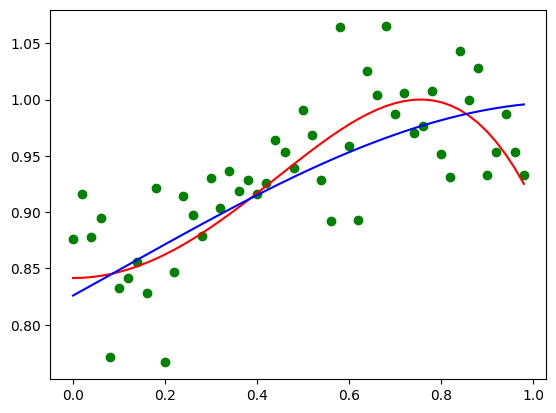

In [67]:
plt.plot(x,y,'r-')
plt.scatter(x,y_s,color='green')
plt.plot(x,y_est,color='blue')
plt.show()